# КММФЯ, задание 4
## Методические указания по выполнению работы

### Одномерная решетка с базисом
Под термином решетка с базисом подразумевают наличие нескольких атомов в элементарной ячейке (У железа их два). То есть, добавляют дополнительное пространство, возможные координаты в котором перебирают все атомы в элементарной ячейке.
Если для двухатомной элементарной ячейки составить уравнение движения по принципу, предложенному в предыдущей работе, то мы получим уравнение движения, где второй нижний индекс $U_{l,i}$ - это номер атома в элементарной ячейке:

$$\begin{pmatrix} m_1&0 \\ 0&m_2 \end{pmatrix}\begin{pmatrix} \ddot{U}_{l,0} \\ \ddot{U}_{l,1} \end{pmatrix}=
\begin{pmatrix} p_2 & -(p_1+p_2) & p_1 & 0 \\ 0 & p_1 & -(p_1+p_2) & p_2 \end{pmatrix}
\begin{pmatrix} U_{l-1,1} \\ U_{l,0} \\  U_{l,1}  \\  U_{l+1,0} \end{pmatrix}$$

И используя подстановку получаем динамическую матрицу:

$$U_{l+1,0}=U_{l,0}e^{2i\pi ka}$$

$$U_{l-1,0}=U_{l,1}e^{-2i\pi ka}$$

$$M\ddot{U}_{l,i}=DU_{l,i}=\begin{pmatrix} p_1+p_2 & -p_1-p_2 e^{-2i\pi ka} \\ -p_1-p_2 e^{2i\pi ka} & p_1+p_2 \end{pmatrix}
\begin{pmatrix} U_{l,0} \\ U_{l,1} \end{pmatrix}$$

Собственные значения динамической матрицы будут отображать оптическую и акустическую моды колебаний. С увеличением числа атомов в элементарной ячейке, будут возникать верхние ветви, соответствующие оптической поляризации фононов.

### Двумерная решетка с базисом

Повторяя выкладки предыдущего пункта попробуйте получить динамическую матрицу для двумерной решетки, скажем 4 на 4 учитывая только ближайших соседей. Сравните:

$$D(a_x,a_y)=\begin{pmatrix}
 a_{11}& 0 & a_{13} & 0 \\ 
 0 & a_{22} & 0 & a_{24} \\ 
 a_{31} & 0 & a_{33} & 0 \\ 
 0 & a_{42} & 0 & a_{44}
\end{pmatrix}$$

$$a_{11}=a_{22}=\frac{1}{m_1}(p_{1x}+p_{1y}+p_{2x}+p_{2y})$$

$$a_{33}=a_{44}=\frac{1}{m_2}(p_{1x}+p_{1y}+p_{2x}+p_{2y})$$

$$a_{13}=a_{24}=\frac{1}{m_1}\left(-p_{1x}-p_{2x}e^{2i\pi k(-a_x,-a_y)}-p_{1y}e^{2i\pi k(-a_x,0)}-p_{2y}e^{2i\pi k(0,-a_y)}\right)$$

$$a_{31}=a_{42}=\frac{1}{m_2}\left(-p_{1x}-p_{2x}e^{2i\pi k(a_x,a_y)}-p_{1y}e^{2i\pi k(a_x,0)}-p_{2y}e^{2i\pi k(0,a_y)}\right)$$

### Имплементация на языке *Julia*


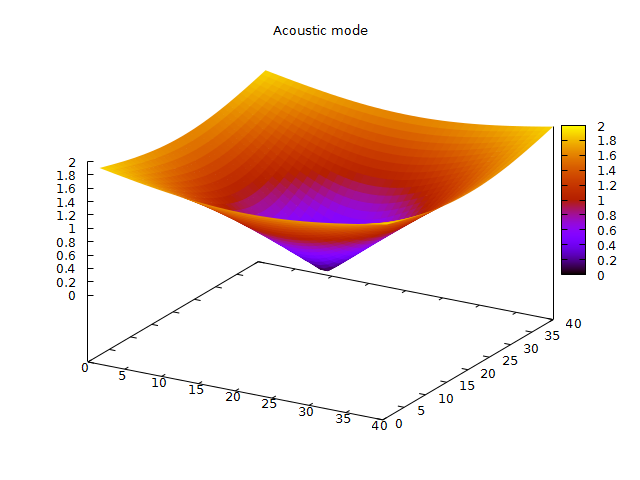

1

In [1]:
function k(x,y)
    (x+y)*a;
end

function Dynmatr(ax, ay)
    a11 = a22 = (p1x+p1y+p2x+p2y)/m1;
    a33 = a44 = a11*m1/m2;
    a13 = a24 = ( -p1x-p1y*exp(2im*pi*k(-ax,0))-p2x*exp(2im*pi*k(-ax,-ay))-p2y*exp(2im*pi*k(0,-ay)) )/m1;
    a31 = a42 = ( -p1x-p1y*exp(2im*pi*k( ax,0))-p2x*exp(2im*pi*k( ax, ay))-p2y*exp(2im*pi*k(0, ay)) )/m2;

    D = [a11 0 a13 0;
        0 a22 0 a24;
        a31 0 a33 0;
        0 a42 0 a44];
end

a = 1; #4.95e-10;
p = 1; #4e-24;
m = 1; #34.53e-26;
m1 = m2 = m;
p1x = p1y = p2x = p2y = p;

X = linspace(-1//8*pi,1//8*pi,40);
Y = X;
N = length(X);
D = ev = zeros(4);
ev1 = zeros(N, N);
ev2 = zeros(N, N);
ev3 = zeros(N, N);
ev4 = zeros(N, N);

for i in eachindex(X)
    for j in eachindex(Y)
        D = Dynmatr(X[i], Y[j]);
        ev = eigvals(D); # eigenvalues
        ev1[i,j] = sqrt( abs(ev[1]) );
        ev2[i,j] = sqrt( abs(ev[2]) );
        ev3[i,j] = sqrt( abs(ev[3]) );
        ev4[i,j] = sqrt( abs(ev[4]) );
    end
end

OmXopt = zeros(N);
OmLopt = zeros(N);
OmXacs = zeros(N);
OmLacs = zeros(N);

for i = 1:N
    OmXopt[i] = ev3[i,N >> 1];
    OmLopt[i] = ev4[i,i];
    OmXacs[i] = ev1[i,N >> 1];
    OmLacs[i] = ev2[i,i];
end

R = X*sqrt(2);

using Gaston

surf(ev1,plotstyle="pm3d",title = "Acoustic mode") # and ev2 -> acoustic mode

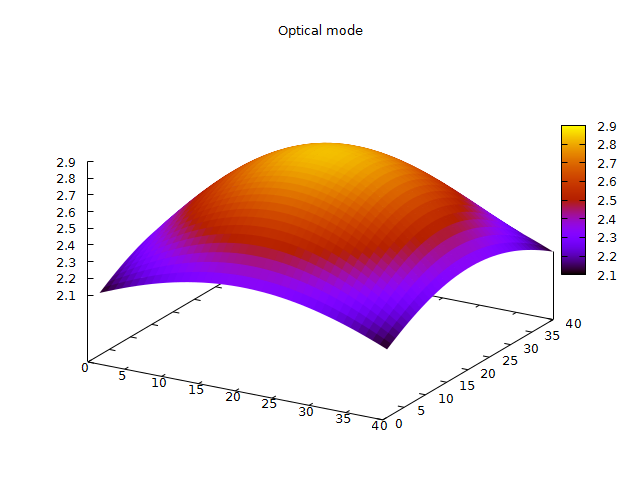

1

In [2]:
surf(ev3,plotstyle="pm3d",title = "Optical mode") # and ev4 -> optical mode

Получен фононный спектр двумерного кристалла с двумя атомами в элементарной ячейке. Изображена первая зона Бриллюэна. Снизу акустическая ветвь, сверху – оптическая, при этом ветви двукратно вырождены. По аналогии с выполнением предыдущего задания потребуется выбрать нужные элементы, соответствующие направлениям X и L, скопировать их в одномерные массивы и построить их графики (Можно использовать функцию plot() из пакета Gaston). Стоит учитывать, что здесь $a$ - расстояние между атомами, но не параметр решетки, так как расчетная плоскость срезает модельный образец кристалла не параллельно плоскостям, образованными базисными осями, а под углом в $45^{\circ}$ к одной из них. Также нужно правильно отобразить масштабы задачи на осях, для этого заведите отдельные массивы для координат, проинициализировав их в соответсвии с константами, приведенными в задании. 